In [23]:
import os

import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.metrics import BinaryCrossentropy
from tensorflow.keras import regularizers

In [32]:
df: pd.DataFrame = pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [35]:
from sklearn import preprocessing 
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
df["LUNG_CANCER"] = label_encoder.fit_transform(df['LUNG_CANCER'])
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [37]:
x = df.drop(['LUNG_CANCER','GENDER'], axis=1)
y = df['LUNG_CANCER']

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

In [39]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

In [40]:
def make_model(_optimizer, _i) -> keras.Sequential:
    model = keras.Sequential(name=f'cancer_{_i}')
    model.add(keras.Input((14,)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=_optimizer,
        metrics=['accuracy']
    )

    model.summary()
    return model

In [41]:
models = []
for i, optimizer in enumerate(optimizers):
    model = make_model(optimizer, i)
    models.append(model)

Model: "cancer_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 256)               3840      
                                                                 
 dense_46 (Dense)            (None, 256)               65792     
                                                                 
 dense_47 (Dense)            (None, 1)                 257       
                                                                 
Total params: 69889 (273.00 KB)
Trainable params: 69889 (273.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "cancer_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 256)               3840      
                                                                 
 d

In [52]:
histories = []
for i, model in enumerate(models):
    histories.append(model.fit(xtrain, ytrain, epochs=40, batch_size=10).history)
    model.save(f'saved/Q1/cancer_{i}.h5')

Epoch 1/40
24/24 [==============================] - 0s 4ms/step - loss: 0.3831 - accuracy: 0.8745
Epoch 2/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3831 - accuracy: 0.8745
Epoch 3/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8745
Epoch 4/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8745
Epoch 5/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3832 - accuracy: 0.8745
Epoch 6/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8745
Epoch 7/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8745
Epoch 8/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8745
Epoch 9/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3828 - accuracy: 0.8745
Epoch 10/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8745
Epoch 11/40
24/24 [

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.8745
Epoch 3/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3174 - accuracy: 0.8745
Epoch 4/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.8745
Epoch 5/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3189 - accuracy: 0.8745
Epoch 6/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8745
Epoch 7/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.8745
Epoch 8/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3164 - accuracy: 0.8745
Epoch 9/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8745
Epoch 10/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3155 - accuracy: 0.8745
Epoch 11/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3137 - accuracy: 0.8745
Epoch 12/40
24/24 [==========

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 0s 3ms/step - loss: 0.2529 - accuracy: 0.8874
Epoch 3/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2370 - accuracy: 0.8918
Epoch 4/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2192 - accuracy: 0.9048
Epoch 5/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.8874
Epoch 6/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2409 - accuracy: 0.9134
Epoch 7/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2179 - accuracy: 0.9091
Epoch 8/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2340 - accuracy: 0.9134
Epoch 9/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.9048
Epoch 10/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.8961
Epoch 11/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2393 - accuracy: 0.9134
Epoch 12/40
24/24 [==========

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 0s 3ms/step - loss: 0.2275 - accuracy: 0.9048
Epoch 3/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.8961
Epoch 4/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2111 - accuracy: 0.9134
Epoch 5/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2158 - accuracy: 0.9048
Epoch 6/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2114 - accuracy: 0.9221
Epoch 7/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2271 - accuracy: 0.9091
Epoch 8/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.8918
Epoch 9/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2020 - accuracy: 0.9091
Epoch 10/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.9134
Epoch 11/40
24/24 [==============================] - 0s 3ms/step - loss: 0.2362 - accuracy: 0.9091
Epoch 12/40
24/24 [==========

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.8745
Epoch 3/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.8745
Epoch 4/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3553 - accuracy: 0.8701
Epoch 5/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3513 - accuracy: 0.8788
Epoch 6/40
24/24 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8745
Epoch 7/40
24/24 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8745
Epoch 8/40
24/24 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8788
Epoch 9/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3372 - accuracy: 0.8745
Epoch 10/40
24/24 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8788
Epoch 11/40
24/24 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8745
Epoch 12/40
24/24 [==========

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
histories[0].keys()

dict_keys(['loss', 'accuracy'])

In [54]:
acc_scores = []
hs = []
for i, model in enumerate(models):
    ypred = model.predict(xtest)
    print(ypred.shape)
    for j in range(len(ypred)):
        if ypred[j] < 0.5: ypred[j] = 0
        else: ypred[j] = 1
    print(ypred.shape)
    
    acc_scores.append(accuracy_score(ytest, ypred))

    hs.append({
        'acc': histories[i]['accuracy'],
        'loss': histories[i]['loss']
    })    

3/3 [==============================] - 0s 3ms/step
(78, 1)
(78, 1)
3/3 [==============================] - 0s 4ms/step
(78, 1)
(78, 1)
3/3 [==============================] - 0s 3ms/step
(78, 1)
(78, 1)
3/3 [==============================] - 0s 3ms/step
(78, 1)
(78, 1)
3/3 [==============================] - 0s 4ms/step
(78, 1)
(78, 1)


In [55]:
for i, optimizer in enumerate(optimizers):
    print(f'{optimizer}: {acc_scores[i]:.2f}')

Adadelta: 0.87
Adagrad: 0.87
Adam: 0.88
RMSprop: 0.90
SGD: 0.87


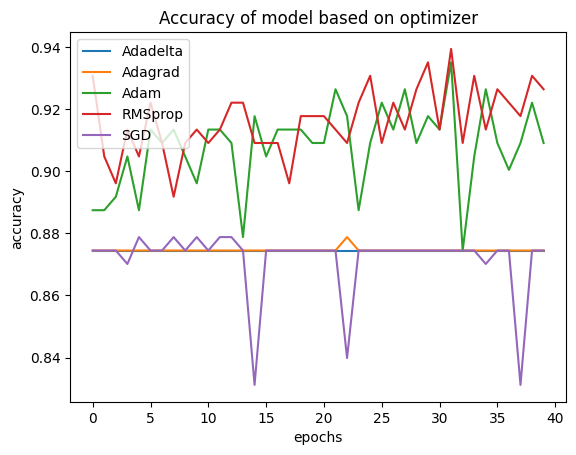

In [56]:
for i in range(len(hs)):
    plt.plot(hs[i]['acc'])
    plt.title('Accuracy of model based on optimizer')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')

plt.legend(optimizers, loc='upper left')
plt.show()

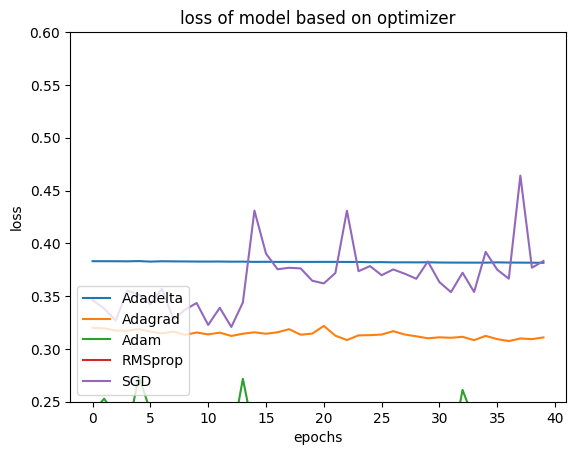

In [57]:
for i in range(len(hs)):
    plt.plot(hs[i]['loss'])
    plt.title('loss of model based on optimizer')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.ylim([0.25, 0.60])

plt.legend(optimizers, loc='lower left')
plt.show()